In [1]:
import pandas as pd
training = pd.read_pickle("training_joined")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import Normalizer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



In [3]:
X = training.drop(columns = "h1n1_vaccine",axis=1)
y = training["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 42)

In [4]:
X.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
for col in training.columns[training.dtypes == "object"]:
    print(f'{col}:\n', training[col].value_counts(normalize = True)*100, '\n')

age_group:
 65+ Years        25.622496
55 - 64 Years    20.829745
45 - 54 Years    19.612836
18 - 34 Years    19.526716
35 - 44 Years    14.408208
Name: age_group, dtype: float64 

education:
 College Graduate    39.909091
Some College        27.837945
12 Years            22.913043
< 12 Years           9.339921
Name: education, dtype: float64 

race:
 White                79.462313
Black                 7.930505
Hispanic              6.571311
Other or Multiple     6.035871
Name: race, dtype: float64 

sex:
 Female    59.377691
Male      40.622309
Name: sex, dtype: float64 

income_poverty:
 <= $75,000, Above Poverty    57.337103
> $75,000                    30.560043
Below Poverty                12.102854
Name: income_poverty, dtype: float64 

marital_status:
 Married        53.579193
Not Married    46.420807
Name: marital_status, dtype: float64 

rent_or_own:
 Own     75.961889
Rent    24.038111
Name: rent_or_own, dtype: float64 

employment_status:
 Employed              53.715734
No

## Model 1 - Baseline Logistic Regression

In [6]:
age_list = ["18 - 34 Years", "35 - 44 Years","45 - 54 Years","55 - 64 Years","65+ Years"]
ed_list = ["< 12 Years","12 Years","Some College","College Graduate"]
income_list = ["Below Poverty","<= $75,000, Above Poverty","> $75,000"]

In [7]:
numeric_pipeline = Pipeline([("numimputer",SimpleImputer(strategy = "mean")),
                             ("numnorm",StandardScaler())])
ordinal_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [age_list,ed_list,income_list])),
    ('ordnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

In [8]:
num_cols = X_train.select_dtypes(["int","float"]).columns

ct = ColumnTransformer(
    [("ordinal_pipe", ordinal_pipeline,["age_group","education","income_poverty"]),
     ("nominal_pipe", nominal_pipeline,["race","sex","marital_status","rent_or_own","employment_status","census_msa"]),
     ("num_pipe", numeric_pipeline, num_cols)])

In [9]:
pipeline_1 = Pipeline([("preprocess",ct),
                           ("model",LogisticRegression())])

In [10]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [11]:
y_pred1 = pipeline_1.predict(X_test)

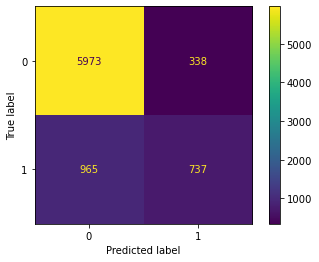

In [12]:
plot_confusion_matrix(pipeline_1, X_test,y_test)

In [13]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6311
           1       0.69      0.43      0.53      1702

    accuracy                           0.84      8013
   macro avg       0.77      0.69      0.72      8013
weighted avg       0.82      0.84      0.82      8013



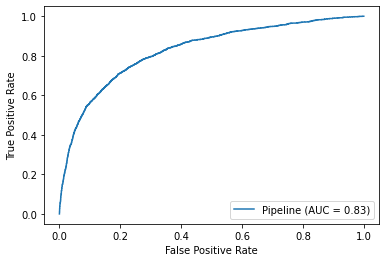

In [14]:
plot_roc_curve(pipeline_1, X_test, y_test)

## Model 2 -  Logistic Regression + SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

In [16]:
pipeline_2 = Pipeline([("preprocess",ct),
                       ("smote",smt),
                       ("model",LogisticRegression())])

In [17]:
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('smote', SMOTE()), ('model', LogisticRegression())])

In [18]:
y_pred2 = pipeline_2.predict(X_test)

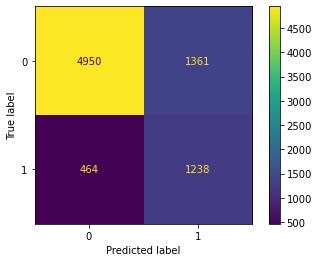

In [19]:
plot_confusion_matrix(pipeline_2, X_test,y_test)

In [20]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6311
           1       0.48      0.73      0.58      1702

    accuracy                           0.77      8013
   macro avg       0.70      0.76      0.71      8013
weighted avg       0.82      0.77      0.79      8013



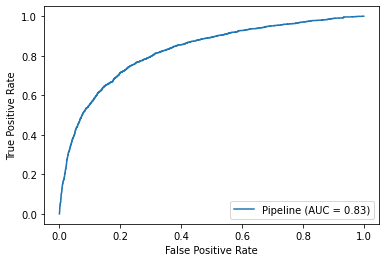

In [21]:
plot_roc_curve(pipeline_2, X_test, y_test)

## Model 3 - Logistic Regression + Oversampling

In [22]:
oversample = RandomOverSampler()

In [23]:
pipeline_3 = Pipeline([("preprocess",ct),
                       ("oversample",oversample),
                       ("model",LogisticRegression())])

In [24]:
pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('oversample', RandomOverSampler()),
                ('model', LogisticRegression())])

In [25]:
y_pred3 = pipeline_3.predict(X_test)

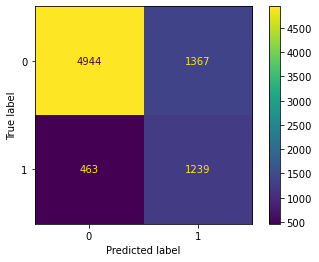

In [26]:
plot_confusion_matrix(pipeline_3, X_test,y_test)

In [27]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6311
           1       0.48      0.73      0.58      1702

    accuracy                           0.77      8013
   macro avg       0.69      0.76      0.71      8013
weighted avg       0.82      0.77      0.79      8013



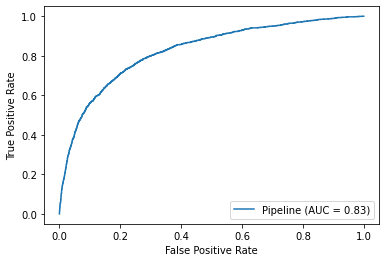

In [28]:
plot_roc_curve(pipeline_3, X_test, y_test)

## Model 4 - Logistic Regression + Undersampling

In [29]:
undersample = RandomUnderSampler()

In [30]:
pipeline_4 = Pipeline([("preprocess",ct),
                       ("undersample",undersample),
                       ("model",LogisticRegression())])

In [31]:
pipeline_4.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('undersample', RandomUnderSampler()),
                ('model', LogisticRegression())])

In [32]:
y_pred4 = pipeline_4.predict(X_test)

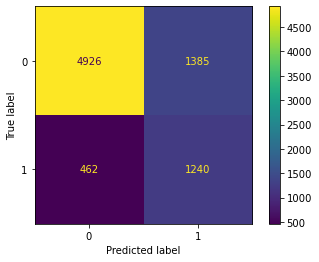

In [33]:
plot_confusion_matrix(pipeline_4, X_test,y_test)

In [34]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6311
           1       0.47      0.73      0.57      1702

    accuracy                           0.77      8013
   macro avg       0.69      0.75      0.71      8013
weighted avg       0.82      0.77      0.78      8013



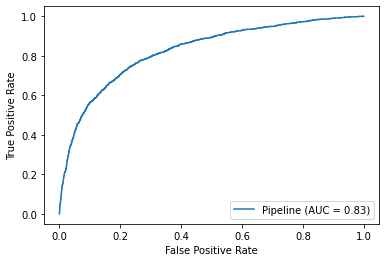

In [35]:
plot_roc_curve(pipeline_4, X_test, y_test)

## Model 5 - Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
pipeline_5 = Pipeline([("preprocess",ct),
                       ("smote",smt),
                       ("model",RandomForestClassifier(n_estimators = 100,max_depth=10))]) #10 was best at 86 ROC

In [110]:
pipeline_5.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('model', RandomForestClassifier(max_depth=10))])

In [111]:
y_pred5 = pipeline_5.predict(X_test)

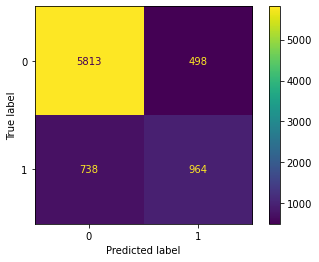

In [112]:
plot_confusion_matrix(pipeline_5, X_test,y_test)

In [113]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6311
           1       0.66      0.57      0.61      1702

    accuracy                           0.85      8013
   macro avg       0.77      0.74      0.76      8013
weighted avg       0.84      0.85      0.84      8013



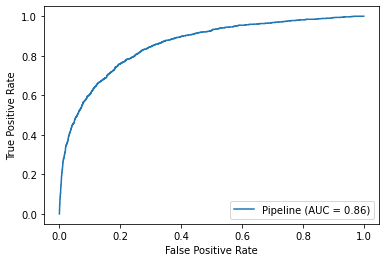

In [114]:
plot_roc_curve(pipeline_5, X_test, y_test)

## Model 6 - Random Forest Classifier + Hyperparameter Tuning

In [44]:
pipeline_6 = Pipeline([("preprocess",ct),
                       ("smote",smt),
                       ("model",RandomForestClassifier())])

In [45]:
param_grid = {
    'model__n_estimators': [25, 50, 100, 150],
    'model__max_features': ['sqrt', 'log2', None],
    'model__max_depth': [3, 6, 9],
    'model__max_leaf_nodes': [3, 6, 9],
}

## Find other features to edit based on previous model

In [46]:
tuned_pipeline_6 = GridSearchCV(estimator=pipeline_6, 
                       param_grid=param_grid)

In [47]:
tuned_pipeline_6.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordenc',
                                                                                          OrdinalEncoder(categories=[['18 '
                                                                                                                      '- '
                                                                                                                      '34 '
                                                                                                                      'Years',
                                                                                                                      '35 '
                                                                                                                      '- '
                                                                                                                      '44 '
                                                                                                                      'Years',
                                                                                                                      '45 '
                                                                                                                      '- '
                                                                                                                      '54 '
                                                                                                                      'Years',
                                                                                                                      '55 '
                                                                                                                      '- '
                                                                                                                      '64 '
                                                                                                                      'Years',
                                                                                                                      '65+ '
                                                                                                                      'Years'],
                                                                                                                     ['< '
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      'Some '
                                                                                                                      'College',
                                                                                                                      'Colle...
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                                       ('smote', SMOTE()),
    

In [49]:
y_pred6 = tuned_pipeline_6.predict(X_test)

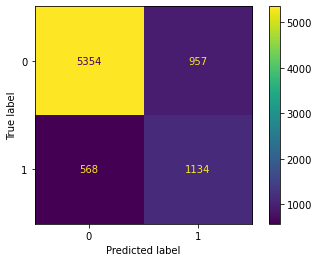

In [50]:
plot_confusion_matrix(tuned_pipeline_6, X_test,y_test)

In [51]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      6311
           1       0.54      0.67      0.60      1702

    accuracy                           0.81      8013
   macro avg       0.72      0.76      0.74      8013
weighted avg       0.83      0.81      0.82      8013



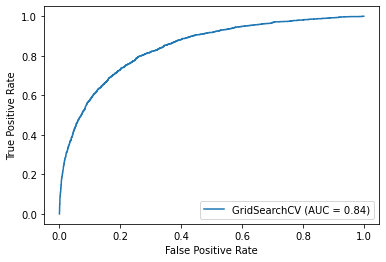

In [52]:
plot_roc_curve(tuned_pipeline_6, X_test, y_test)

## Model 7 - Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
pipeline_7 = Pipeline([("preprocess",ct),
                       ("smote",smt),
                       ("model",GradientBoostingClassifier())])

In [55]:
pipeline_7.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                                                                                               '44 '
                                                                                               'Years',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '54 '
                                                                                               'Years',
                                                                                               '55 '
                                                                                               '- '
                                                                                               '64 '
                                                                                               'Years',
                                                                                               '65+ '
                                                                                               'Years'],
                                                                                              ['< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate'],
                                                                                              ['Below '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('smote', SMOTE()), ('model', GradientBoostingClassifier())])

In [56]:
y_pred7 = pipeline_7.predict(X_test)

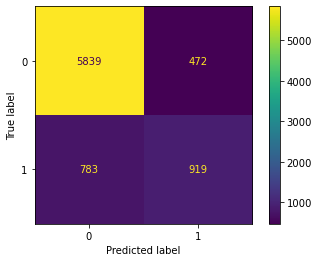

In [57]:
plot_confusion_matrix(pipeline_7, X_test,y_test)

In [58]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6311
           1       0.66      0.54      0.59      1702

    accuracy                           0.84      8013
   macro avg       0.77      0.73      0.75      8013
weighted avg       0.83      0.84      0.84      8013



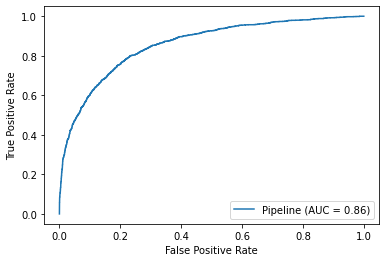

In [59]:
plot_roc_curve(pipeline_7, X_test, y_test)

## Model 8 - Gradient Boosting + Hyperparameter Tuning

In [115]:
pipeline_8 = Pipeline([("preprocess",ct),
                       ("smote",smt),
                       ("model",GradientBoostingClassifier())])

In [116]:
param_grid = {
    'model__learning_rate': [0.1, 0.05, 0.01],
    "model__n_estimators" : [32, 64, 100, 200],
    "model__max_depth" : [3,5,7]
}

In [117]:
tuned_pipeline_8 = GridSearchCV(estimator=pipeline_8, 
                       param_grid=param_grid)

In [118]:
tuned_pipeline_8.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordenc',
                                                                                          OrdinalEncoder(categories=[['18 '
                                                                                                                      '- '
                                                                                                                      '34 '
                                                                                                                      'Years',
                                                                                                                      '35 '
                                                                                                                      '- '
                                                                                                                      '44 '
                                                                                                                      'Years',
                                                                                                                      '45 '
                                                                                                                      '- '
                                                                                                                      '54 '
                                                                                                                      'Years',
                                                                                                                      '55 '
                                                                                                                      '- '
                                                                                                                      '64 '
                                                                                                                      'Years',
                                                                                                                      '65+ '
                                                                                                                      'Years'],
                                                                                                                     ['< '
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      'Some '
                                                                                                                      'College',
                                                                                                                      'Colle...
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype

In [119]:
tuned_pipeline_8.best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 5,
 'model__n_estimators': 200}

In [121]:
y_pred8 = tuned_pipeline_8.predict(X_test)

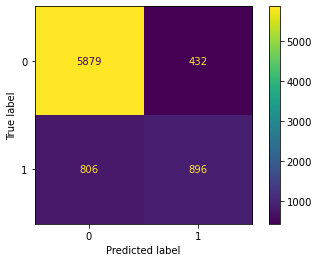

In [125]:
plot_confusion_matrix(tuned_pipeline_8, X_test,y_test)

In [126]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6311
           1       0.67      0.53      0.59      1702

    accuracy                           0.85      8013
   macro avg       0.78      0.73      0.75      8013
weighted avg       0.84      0.85      0.84      8013



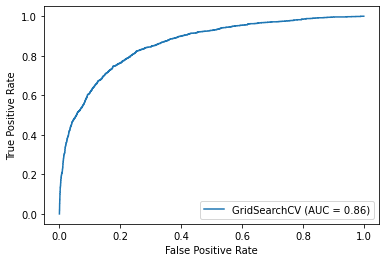

In [127]:
plot_roc_curve(tuned_pipeline_8, X_test, y_test)

## Model 9 